In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from qiskit_metal import designs, MetalGUI

design = designs.DesignPlanar()
design.overwrite_enabled = True

In [5]:
design.chips.main.size_x = '12mm'
design.chips.main.size_y = '10mm'

In [6]:
gui = MetalGUI(design)

In [7]:
from qiskit_metal.qlibrary.qubits.transmon_pocket_cl import TransmonPocketCL

design.delete_all_components()

design_span_x = 5
design_span_y = 3

half_chip_width = design_span_x / 2
half_chip_height = design_span_y / 2

connection_pads_options = dict(
    a = dict(loc_W=1, loc_H=-1),
    b = dict(loc_W=1, loc_H=1),
    c = dict(loc_W=-1, loc_H=-1)
)

transmons = []

transmons.append(TransmonPocketCL(design, 'Q1',
                      options=dict(pos_x=f'-{half_chip_width}mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   connection_pads=dict(**connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q2',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=-90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q3',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   orientation=90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q4',
                      options=dict(pos_x=f'{half_chip_width}mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=180,
                                   connection_pads=dict(**connection_pads_options))))

gui.rebuild()
gui.autoscale()

In [8]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal import Dict

fillet='99.99um'
options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)

def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', start_strght='0 um', end_strght='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight=start_strght,
            end_straight=end_strght
        ),
        total_length=length,
    fillet = '99.9um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

asym_h = 100
asym_v = 100
cpw = []

cpw.append(connect('cpw1', 'Q1', 'b', 'Q2', 'a', '8 mm', f'+{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw2', 'Q3', 'b', 'Q2', 'b', '8 mm', f'-{asym_v}um', '0.6mm', '0.4mm'))
cpw.append(connect('cpw3', 'Q4', 'b', 'Q3', 'a', '8 mm', f'+{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw4', 'Q3', 'd', 'Q1', 'a', '8 mm', f'-{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw5', 'Q2', 'd', 'Q4', 'a', '8 mm', f'-{asym_h}um', '0.1mm', '0.1mm'))


gui.rebuild()
gui.autoscale()

In [9]:
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

readouts_lwc = []
control_lwc = []

offset_x = 0
offset_y = 1


#Readouts
readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R1',
                                         options = dict(
                                         pos_x = '-5mm',
                                         pos_y = f'-{half_chip_height+offset_y}mm',
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R2',
                                         options = dict(
                                         pos_x = '-1mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R3',
                                         options = dict(
                                         pos_x = '1mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R4',
                                         options = dict(
                                         pos_x = '5mm',
                                         pos_y = f'{half_chip_height+offset_y}mm',
                                         orientation = 180,
                                         lead_length = '30um')))

#Controls
control_lwc.append(LaunchpadWirebondCoupled(design, 'CL1',
                                         options = dict(
                                         pos_x = '-5mm',
                                         pos_y = '2mm',
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL2',
                                         options = dict(
                                         pos_x = '4mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL3',
                                         options = dict(
                                         pos_x = '-4mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL4',
                                         options = dict(
                                         pos_x = '5mm',
                                         pos_y = '-2mm',
                                         orientation = 180,
                                         lead_length = '30um')))

gui.rebuild()
gui.autoscale()

In [10]:
readout_lines = []

asym_14 = 700
asym_23 = 700
options = Dict(
    lead=Dict(
        start_straight='430um',
        end_straight='0um'),
    fillet='99.99um')

readout_lines.append(connect('ol1', 'Q1', 'c', 'R1', 'tie', '8 mm', f'{asym_14}um'))
readout_lines.append(connect('ol2', 'Q2', 'c', 'R2', 'tie', '8 mm', f'{asym_23}um'))
readout_lines.append(connect('ol3', 'Q3', 'c', 'R3', 'tie', '8 mm', f'{asym_23}um'))
readout_lines.append(connect('ol4', 'Q4', 'c', 'R4', 'tie', '8 mm', f'{asym_14}um'))

gui.rebuild()
gui.autoscale()

In [11]:
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from collections import OrderedDict
import numpy as np

control_lines = []

def connectRouteAnchor(name: str,
                       component1: str, pin1: str, component2: str, pin2: str,
                       anchor_points: OrderedDict) -> RouteAnchors:

    options_line_cl = dict(
        pin_inputs = dict(start_pin = dict(component = component1, pin = pin1),
                          end_pin = dict(component = component2, pin = pin2)),
        anchors = anchor_points,
        lead = dict(start_straight = '200um',
                    end_straight = '225um'),
        fillet = fillet
    )
    
    return RouteAnchors(design, name, options_line_cl)



anchors1c = OrderedDict()
anchors1c[0] = np.array([-4, -1.42])
anchors1c[1] = np.array([-4, 2])

control_lines.append(connectRouteAnchor('line_cl1', 'Q1', 'Charge_Line', 'CL1', 'tie', anchors1c))


anchors2c = OrderedDict()
anchors2c[0] = np.array([0.08, 3.25])
anchors2c[1] = np.array([4, 3.25])

control_lines.append(connectRouteAnchor('line_cl2', 'Q2', 'Charge_Line', 'CL2', 'tie', anchors2c))

anchors3c = OrderedDict()
anchors3c[0] = np.array([-0.08, -3.25])
anchors3c[1] = np.array([-4, -3.25])

control_lines.append(connectRouteAnchor('line_cl3', 'Q3', 'Charge_Line', 'CL3', 'tie', anchors3c))

anchors4c = OrderedDict()
anchors4c[0] = np.array([4, 1.42])
anchors4c[1] = np.array([4, -2])

control_lines.append(connectRouteAnchor('line_cl4', 'Q4', 'Charge_Line', 'CL4', 'tie', anchors4c))

gui.rebuild()
gui.autoscale()

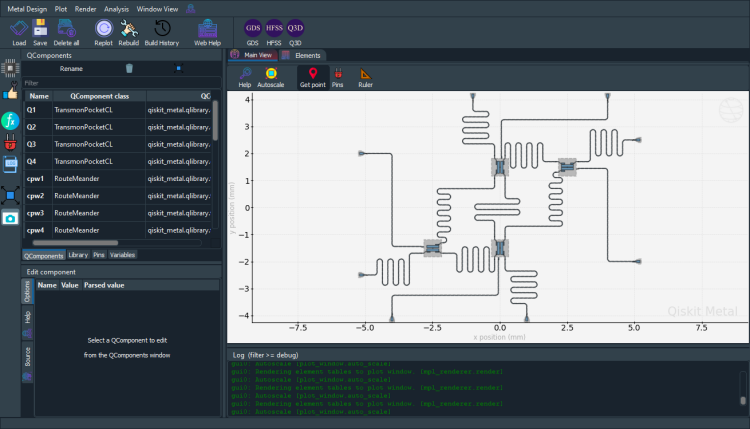

In [12]:
gui.screenshot()

In [13]:
# Qubit Frequencies
# Q1 : 5
# Q2 : 5.1
# Q3 : 5.2
# Q4 : 5.3

# Readout Frequencies
# R1 : 7
# R2 : 7.1
# R3 : 7.2
# R4 : 7.3

# CPW Frequencies
# cpw1 : 7.5
# cpw2 : 7.6
# cpw3 : 7.7
# cpw4 : 7.8
# cpw5 : 7.9

### Old LOM Analysis

#### Qubit (Q1)

In [14]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")
q3d1 = c1.sim.renderer
q3d1.start()

INFO 12:10AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:10AM [load_ansys_project]: 	Opened Ansys App
INFO 12:10AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 12:10AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project3
INFO 12:10AM [connect_design]: No active design found (or error getting active design).
INFO 12:10AM [connect]: 	 Connected to project "Project3". No design detected


True

In [15]:
transmons[0].options.pad_gap    = '40um'
transmons[0].options.pad_width  = '405um'
transmons[0].options.pad_height = '90um'
gui.rebuild() # IMPORTANT

q3d1.activate_ansys_design("Tune_Q1", 'capacitive')
q3d1.render_design(['Q1'], [('Q1', 'c'), ('Q1', 'a'),('Q1', 'b'),('Q1', 'Charge_Line')])

12:10AM 48s WARNING [activate_ansys_design]: The design_name=Tune_Q1 was not in active project.  Designs in active project are: 
[].  A new design will be added to the project.  
INFO 12:10AM [connect_design]: 	Opened active design
	Design:    Tune_Q1 [Solution type: Q3D]
WARNING 12:10AM [connect_setup]: 	No design setup detected.
WARNING 12:10AM [connect_setup]: 	Creating Q3D default setup.
INFO 12:10AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


In [16]:
#q3d1.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/q1.png")

In [17]:
q3d1.add_q3d_setup(name="Setup", max_passes=15, min_converged_passes=5,percent_error=0.05 )
q3d1.analyze_setup("Setup")
c1.sim.capacitance_matrix, c1.sim.units = q3d1.get_capacitance_matrix()
c1.sim.capacitance_all_passes, _ = q3d1.get_capacitance_all_passes()
c1.sim.capacitance_matrix

INFO 12:11AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 12:11AM [analyze]: Analyzing setup Setup
INFO 12:14AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpk4noiicm.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 12:14AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp2rsscazl.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 12:14AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpat6fcq_8.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 12:14AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpzzq7zm2f.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 12:14AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData

,a_connector_pad_Q1,b_connector_pad_Q1,c_connector_pad_Q1,cl_metal_Q1,ground_main_plane,pad_bot_Q1,pad_top_Q1
a_connector_pad_Q1,50.69228,-0.33796,-0.45073,-0.00931,-34.00654,-13.49711,-1.52332
b_connector_pad_Q1,-0.33796,50.74702,-0.14421,-0.01141,-34.18666,-1.49626,-13.69033
c_connector_pad_Q1,-0.45073,-0.14421,50.73449,-0.05230,-34.12539,-13.50667,-1.58640
cl_metal_Q1,-0.00931,-0.01141,-0.05230,16.01295,-15.53175,-0.12294,-0.20944
ground_main_plane,-34.00654,-34.18666,-34.12539,-15.53175,248.09927,-33.23860,-37.76618
pad_bot_Q1,-13.49711,-1.49626,-13.50667,-0.12294,-33.23860,90.53020,-26.22066
pad_top_Q1,-1.52332,-13.69033,-1.58640,-0.20944,-37.76618,-26.22066,83.73712


In [18]:
c1.setup.junctions = Dict(Lj=12, Cj=1)
c1.setup.freq_readout = 7.5
c1.setup.freq_bus = [7.8, 7.5, 15]

c1.run_lom()
c1.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 5.038986 [GHz]
EC 258.992882 [MHz]
EJ 13.616300 [GHz]
alpha -296.183928 [MHz]
dispersion 6.554938 [KHz]
Lq 11.995161 [nH]
Cq 74.790581 [fF]
T1 103.960575 [us]

**Coupling Properties**

tCqbus1 -9.546382 [fF]
gbus1_in_MHz -133.797759 [MHz]
χ_bus1 -1.631893 [MHz]
1/T1bus1 1432.030599 [Hz]
T1bus1 111.139345 [us]

tCqbus2 -1.118173 [fF]
gbus2_in_MHz -16.416498 [MHz]
χ_bus2 -0.019904 [MHz]
1/T1bus2 1.699039 [Hz]
T1bus2 93673.510356 [us]

tCqbus3 7.802323 [fF]
gbus3_in_MHz 110.022103 [MHz]
χ_bus3 -1.103453 [MHz]
1/T1bus3 96.831019 [Hz]
T1bus3 1643.635945 [us]

tCqbus4 -1.094271 [fF]
gbus4_in_MHz -30.499829 [MHz]
χ_bus4 -0.006786 [MHz]
1/T1bus4 0.355692 [Hz]
T1bus4 447451.877124 [us]
Bus-Bus Couplings
gbus1_2 51.321602 [MHz]
gbus1_3 75.509387 [MHz]
gbus1_4 94.337324 [MHz]
gbus2_3 27.641214 [MHz]
gbus2_4 70.397455 [MHz]
gbus3_4 49.451453 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.350344,294.229448,13.6163,-340.311696,22.275128,"[-128.35246654158456, -9.17941931140656, 104.1...","[-2.164597524286147, -0.008731817658863017, -1...",2.164598,128.352467
2,5.26148,283.911694,13.6163,-327.299719,15.948383,"[-114.66675420681587, -20.40185276740615, 101....","[-1.5527649390243978, -0.039091033617974426, -...",1.552765,114.666754
3,5.176298,274.217913,13.6163,-315.143293,11.451606,"[-119.39061885708729, -19.083278503181756, 102...","[-1.5224926220627786, -0.031165289247393264, -...",1.522493,119.390619
4,5.129184,268.938373,13.6163,-308.550373,9.488904,"[-122.03195269527339, -17.271945932345773, 104...","[-1.5057426680461385, -0.02426326498939728, -1...",1.505743,122.031953
5,5.103636,266.09978,13.6163,-305.013728,8.556553,"[-126.54265266631532, -17.323860499727104, 106...","[-1.5720042552275753, -0.023748609155416878, -...",1.572004,126.542653
6,5.078283,263.299787,13.6163,-301.530715,7.713856,"[-128.20326305490042, -16.6454432215244, 107.6...","[-1.567154158609593, -0.021338157443123923, -1...",1.567154,128.203263
7,5.06773,262.139281,13.6163,-300.088732,7.385752,"[-130.4059493987157, -16.39335714540411, 108.2...","[-1.6019660204849244, -0.02046493257837152, -1...",1.601966,130.405949
8,5.053504,260.579337,13.6163,-298.151914,6.963364,"[-131.6973884653301, -16.351725633271204, 108....","[-1.6074733535501131, -0.02005481038915058, -1...",1.607473,131.697388
9,5.043095,259.441355,13.6163,-296.740077,6.668284,"[-132.96599108673794, -16.089255234233224, 109...","[-1.6192347493361468, -0.01920238066046346, -1...",1.619235,132.965991
10,5.038986,258.992882,13.6163,-296.183928,6.554938,"[-133.79775901970703, -16.4164982204082, 110.0...","[-1.6318925819901084, -0.019904349916913644, -...",1.631893,133.797759


In [19]:
c1.plot_convergence()
c1.plot_convergence_chi()

Design "Tune_Q1" info:
	# eigenmodes    0
	# variations    1


INFO 12:14AM [hfss_report_full_convergence]: Creating report for variation 0


<img src="./new graphs/q1 fig1.png">
<img src="./new graphs/q1 fig2.png">

#### Qubit (Q2)

In [20]:
from qiskit_metal.analyses.quantization import LOManalysis
c2 = LOManalysis(design, "q3d")
q3d2 = c2.sim.renderer
q3d2.start()

INFO 12:14AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:14AM [load_ansys_project]: 	Opened Ansys App
INFO 12:14AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 12:14AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project3
INFO 12:14AM [connect_design]: 	Opened active design
	Design:    Tune_Q1 [Solution type: Q3D]
INFO 12:14AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 12:14AM [connect]: 	Connected to project "Project3" and design "Tune_Q1" 😀 



True

In [21]:
transmons[1].options.pad_gap    = '40um'
transmons[1].options.pad_width  = '378um'
transmons[1].options.pad_height = '90um'
gui.rebuild()


q3d2.activate_ansys_design("Tune_Q2", 'capacitive')
q3d2.render_design(['Q2'], [('Q2', 'c'), ('Q2', 'a'),('Q2', 'b'),('Q2', 'd'),('Q2', 'Charge_Line')])

12:14AM 44s WARNING [activate_ansys_design]: The design_name=Tune_Q2 was not in active project.  Designs in active project are: 
['Tune_Q1'].  A new design will be added to the project.  
INFO 12:14AM [connect_design]: 	Opened active design
	Design:    Tune_Q2 [Solution type: Q3D]
WARNING 12:14AM [connect_setup]: 	No design setup detected.
WARNING 12:14AM [connect_setup]: 	Creating Q3D default setup.
INFO 12:14AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


In [22]:
#q3d2.save_screenshot(path="C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/q2.png")

In [23]:
q3d2.add_q3d_setup(name="Setup", max_passes=15, min_converged_passes=5,percent_error=0.05 )
q3d2.analyze_setup("Setup")
c2.sim.capacitance_matrix, c2.sim.units = q3d2.get_capacitance_matrix()
c2.sim.capacitance_all_passes, _ = q3d2.get_capacitance_all_passes()
c2.sim.capacitance_matrix

INFO 12:14AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 12:14AM [analyze]: Analyzing setup Setup
INFO 12:17AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmply9880q_.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 12:17AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmprnuh6m51.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 12:17AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpgff_e2vk.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 12:17AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpstx71gkr.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 12:17AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData

,a_connector_pad_Q2,b_connector_pad_Q2,c_connector_pad_Q2,cl_metal_Q2,d_connector_pad_Q2,ground_main_plane,pad_bot_Q2,pad_top_Q2
a_connector_pad_Q2,51.40952,-0.37654,-0.58575,-0.00974,-0.16204,-34.36968,-13.50009,-1.49803
b_connector_pad_Q2,-0.37654,51.41744,-0.16200,-0.01118,-0.58254,-34.36426,-1.50474,-13.50438
c_connector_pad_Q2,-0.58575,-0.16200,51.38463,-0.05370,-0.37605,-34.31367,-13.49286,-1.49703
cl_metal_Q2,-0.00974,-0.01118,-0.05370,15.94377,-0.15415,-15.38032,-0.10835,-0.15121
d_connector_pad_Q2,-0.16204,-0.58254,-0.37605,-0.15415,51.48480,-34.28866,-1.50442,-13.50438
ground_main_plane,-34.36968,-34.36426,-34.31367,-15.38032,-34.28866,271.68302,-30.07801,-30.02652
pad_bot_Q2,-13.50009,-1.50474,-13.49286,-0.10835,-1.50442,-30.07801,86.23568,-23.77326
pad_top_Q2,-1.49803,-13.50438,-1.49703,-0.15121,-13.50438,-30.02652,-23.77326,86.25688


In [24]:
c2.setup.junctions = Dict(Lj=12, Cj=1)
c2.setup.freq_readout = 7.1
c2.setup.freq_bus = [7.5, 7.6, 7.9, 17]

c2.run_lom()
c2.lumped_oscillator_all

[5, 6] [7 0 1 2 3]
Predicted Values

Transmon Properties
f_Q 5.106990 [GHz]
EC 266.471547 [MHz]
EJ 13.616300 [GHz]
alpha -305.476596 [MHz]
dispersion 8.674073 [KHz]
Lq 11.995161 [nH]
Cq 72.691544 [fF]
T1 50.242131 [us]

**Coupling Properties**

tCqbus1 -11.522188 [fF]
gbus1_in_MHz -156.572634 [MHz]
χ_bus1 -3.372646 [MHz]
1/T1bus1 3067.920893 [Hz]
T1bus1 51.877134 [us]

tCqbus2 -2.599376 [fF]
gbus2_in_MHz -37.501606 [MHz]
χ_bus2 -0.138599 [MHz]
1/T1bus2 12.090363 [Hz]
T1bus2 13163.784879 [us]

tCqbus3 6.663206 [fF]
gbus3_in_MHz 97.261147 [MHz]
χ_bus3 -0.865074 [MHz]
1/T1bus3 74.739319 [Hz]
T1bus3 2129.467395 [us]

tCqbus4 -2.606547 [fF]
gbus4_in_MHz -39.583439 [MHz]
χ_bus4 -0.116409 [MHz]
1/T1bus4 9.784660 [Hz]
T1bus4 16265.761983 [us]

tCqbus5 3.418668 [fF]
gbus5_in_MHz 112.087448 [MHz]
χ_bus5 -0.068834 [MHz]
1/T1bus5 3.223370 [Hz]
T1bus5 49375.323804 [us]
Bus-Bus Couplings
gbus1_2 36.540741 [MHz]
gbus1_3 64.370996 [MHz]
gbus1_4 38.336201 [MHz]
gbus1_5 24.825540 [MHz]
gbus2_3 24.452184

,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.423998,302.941124,13.6163,-351.35719,29.135515,"[-149.7938927198854, -32.369160005846624, 93.5...","[-4.743896200332651, -0.15064122171714955, -1....",4.743896,149.793893
2,5.337243,292.695178,13.6163,-338.372006,21.219633,"[-140.3693717002468, -35.204483730520856, 90.5...","[-3.688792537026435, -0.16027905223925185, -0....",3.688793,140.369372
3,5.260706,283.822817,13.6163,-327.187962,15.901273,"[-145.22964750794355, -34.1761096455683, 91.30...","[-3.5564231159948405, -0.13780865504675055, -0...",3.556423,145.229648
4,5.219784,279.142774,13.6163,-321.310996,13.580019,"[-146.68547873216784, -35.273931876923136, 92....","[-3.4339388654046306, -0.13986054119450542, -0...",3.433939,146.685479
5,5.183758,275.059218,13.6163,-316.1957,11.793873,"[-149.79056376648444, -34.764690085456614, 93....","[-3.4133645521411466, -0.13022118096526072, -0...",3.413365,149.790564
6,5.154232,271.738019,13.6163,-312.04404,10.490952,"[-151.56931316731388, -36.27718223357999, 94.9...","[-3.3615173453262583, -0.13699457048810307, -0...",3.361517,151.569313
7,5.138026,269.924793,13.6163,-309.780694,9.832324,"[-152.88891297935538, -36.769173225736196, 95....","[-3.3484480460203634, -0.1381096261830813, -0....",3.348448,152.888913
8,5.124563,268.42364,13.6163,-307.90864,9.313755,"[-154.18196982402736, -37.053771360193124, 96....","[-3.3460100166051583, -0.1380842949746457, -0....",3.346010,154.181970
9,5.114246,267.276553,13.6163,-306.479201,8.93322,"[-155.92347754054478, -37.392301324447665, 96....","[-3.3763925120509524, -0.138951259968651, -0.8...",3.376393,155.923478
10,5.10699,266.471547,13.6163,-305.476596,8.674073,"[-156.57263382288738, -37.50160617150344, 97.2...","[-3.372645810154595, -0.13859898335873305, -0....",3.372646,156.572634


In [25]:
c2.plot_convergence()
c2.plot_convergence_chi()

Design "Tune_Q2" info:
	# eigenmodes    0
	# variations    1


INFO 12:17AM [hfss_report_full_convergence]: Creating report for variation 0
INFO 12:17AM [__del__]: Disconnected from Ansys HFSS


<img src="./new graphs/q2 fig1.png">
<img src="./new graphs/q2 fig2.png">

#### Qubit (Q3)

In [26]:
from qiskit_metal.analyses.quantization import LOManalysis
c3 = LOManalysis(design, "q3d")
q3d3 = c3.sim.renderer
q3d3.start()

INFO 12:17AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:17AM [load_ansys_project]: 	Opened Ansys App
INFO 12:17AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 12:17AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project3
INFO 12:17AM [connect_design]: 	Opened active design
	Design:    Tune_Q2 [Solution type: Q3D]
INFO 12:17AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 12:17AM [connect]: 	Connected to project "Project3" and design "Tune_Q2" 😀 



True

In [27]:
transmons[2].options.pad_gap    = '40um'
transmons[2].options.pad_width  = '353um'
transmons[2].options.pad_height = '90um'
gui.rebuild()

q3d3.activate_ansys_design("Tune_Q3", 'capacitive')
q3d3.render_design(['Q3'], [('Q3', 'c'), ('Q3', 'a'),('Q3', 'b'),('Q3', 'd'),('Q3', 'Charge_Line')])

12:17AM 33s WARNING [activate_ansys_design]: The design_name=Tune_Q3 was not in active project.  Designs in active project are: 
['Tune_Q2', 'Tune_Q1'].  A new design will be added to the project.  
INFO 12:17AM [connect_design]: 	Opened active design
	Design:    Tune_Q3 [Solution type: Q3D]
WARNING 12:17AM [connect_setup]: 	No design setup detected.
WARNING 12:17AM [connect_setup]: 	Creating Q3D default setup.
INFO 12:17AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


In [28]:
#q3d3.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/q3.png")

In [29]:
q3d3.add_q3d_setup(name="Setup", max_passes=15, min_converged_passes=5,percent_error=0.05 )
q3d3.analyze_setup("Setup")
c3.sim.capacitance_matrix, c3.sim.units = q3d3.get_capacitance_matrix()
c3.sim.capacitance_all_passes, _ = q3d3.get_capacitance_all_passes()
c3.sim.capacitance_matrix

INFO 12:17AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 12:17AM [analyze]: Analyzing setup Setup
INFO 12:20AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpicivxf_q.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 12:20AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpqpfjy_71.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 12:20AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpc03apk6m.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 12:20AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp5tw0mqwk.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 12:20AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData

,a_connector_pad_Q3,b_connector_pad_Q3,c_connector_pad_Q3,cl_metal_Q3,d_connector_pad_Q3,ground_main_plane,pad_bot_Q3,pad_top_Q3
a_connector_pad_Q3,52.28885,-0.41659,-0.76071,-0.01050,-0.18477,-34.97058,-13.46970,-1.52277
b_connector_pad_Q3,-0.41659,52.29473,-0.18476,-0.01247,-0.76366,-34.97972,-1.51692,-13.47514
c_connector_pad_Q3,-0.76071,-0.18476,52.30764,-0.05609,-0.41656,-34.93612,-13.47626,-1.52348
cl_metal_Q3,-0.01050,-0.01247,-0.05609,15.96195,-0.15577,-15.42211,-0.09945,-0.13542
d_connector_pad_Q3,-0.18477,-0.76366,-0.41656,-0.15577,52.36696,-34.90943,-1.51670,-13.47723
ground_main_plane,-34.97058,-34.97972,-34.93612,-15.42211,-34.90943,270.01646,-27.92710,-27.90836
pad_bot_Q3,-13.46970,-1.51692,-13.47626,-0.09945,-1.51670,-27.92710,82.20132,-22.02885
pad_top_Q3,-1.52277,-13.47514,-1.52348,-0.13542,-13.47723,-27.90836,-22.02885,82.20864


In [30]:
c3.setup.junctions = Dict(Lj=12, Cj=1)
c3.setup.freq_readout = 7.3
c3.setup.freq_bus = [7.7, 7.6, 7.8, 17]

c3.run_lom()
c3.lumped_oscillator_all

[5, 6] [7 0 1 2 3]
Predicted Values

Transmon Properties
f_Q 5.216237 [GHz]
EC 278.739167 [MHz]
EJ 13.616300 [GHz]
alpha -320.804891 [MHz]
dispersion 13.393934 [KHz]
Lq 11.995161 [nH]
Cq 69.492308 [fF]
T1 52.051933 [us]

**Coupling Properties**

tCqbus1 -10.967014 [fF]
gbus1_in_MHz -158.622753 [MHz]
χ_bus1 -3.327696 [MHz]
1/T1bus1 2938.896308 [Hz]
T1bus1 54.154664 [us]

tCqbus2 -2.739456 [fF]
gbus2_in_MHz -41.972589 [MHz]
χ_bus2 -0.169213 [MHz]
1/T1bus2 14.345132 [Hz]
T1bus2 11094.700148 [us]

tCqbus3 6.567630 [fF]
gbus3_in_MHz 99.205687 [MHz]
χ_bus3 -1.018883 [MHz]
1/T1bus3 87.219614 [Hz]
T1bus3 1824.760924 [us]

tCqbus4 -2.752197 [fF]
gbus4_in_MHz -42.710318 [MHz]
χ_bus4 -0.163039 [MHz]
1/T1bus4 13.691739 [Hz]
T1bus4 11624.158657 [us]

tCqbus5 3.338807 [fF]
gbus5_in_MHz 113.299165 [MHz]
χ_bus5 -0.074674 [MHz]
1/T1bus5 3.465516 [Hz]
T1bus5 45925.317315 [us]
Bus-Bus Couplings
gbus1_2 36.725642 [MHz]
gbus1_3 64.864683 [MHz]
gbus1_4 37.168399 [MHz]
gbus1_5 23.860431 [MHz]
gbus2_3 26.0127

,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.539726,316.924414,13.6163,-369.200269,43.778287,"[-150.56006723862984, -41.66407627029326, 98.7...","[-4.569922634144913, -0.24209425722697753, -1....",4.569923,150.560067
2,5.441813,305.070169,13.6163,-354.064844,31.055877,"[-141.15600184721654, -41.87295870673714, 91.3...","[-3.5217086153558594, -0.2178653543879288, -1....",3.521709,141.156002
3,5.379256,297.631756,13.6163,-344.619022,24.772985,"[-147.4667597469534, -36.56814923539504, 92.12...","[-3.5405271489164143, -0.15453535009288596, -1...",3.540527,147.466760
4,5.324032,291.152522,13.6163,-336.4234,20.200849,"[-150.04578623955163, -38.17194289513515, 94.1...","[-3.412952769500439, -0.15806195362186848, -1....",3.412953,150.045786
5,5.29334,287.586754,13.6163,-331.92577,18.001575,"[-152.2316819527803, -38.92889738159924, 95.16...","[-3.3779723670046087, -0.15875725133700144, -1...",3.377972,152.231682
6,5.264906,284.305594,13.6163,-327.795091,16.158585,"[-154.52958109543945, -39.700480370517546, 96....","[-3.357392547034651, -0.15989033929850932, -1....",3.357393,154.529581
7,5.249876,282.579919,13.6163,-325.625684,15.254592,"[-155.48882879319794, -40.40470335703269, 97.6...","[-3.3353397330404313, -0.16283410273255786, -1...",3.335340,155.488829
8,5.235086,280.88754,13.6163,-323.500178,14.409638,"[-156.1731370924212, -41.435762419263085, 98.0...","[-3.3027628268381903, -0.16842988427747, -1.01...",3.302763,156.173137
9,5.224354,279.663234,13.6163,-321.963799,13.82318,"[-157.94417944216144, -41.563565095092585, 98....","[-3.3329550593146364, -0.16744505356894196, -1...",3.332955,157.944179
10,5.216237,278.739167,13.6163,-320.804891,13.393934,"[-158.6227533874381, -41.97258914366891, 99.20...","[-3.3276959468337624, -0.16921347345633767, -1...",3.327696,158.622753


In [31]:
c3.plot_convergence()
c3.plot_convergence_chi()

Design "Tune_Q3" info:
	# eigenmodes    0
	# variations    1


INFO 12:20AM [hfss_report_full_convergence]: Creating report for variation 0


<img src="./new graphs/q3 fig1.png">
<img src="./new graphs/q3 fig2.png">

#### Qubit (Q4)

In [32]:
from qiskit_metal.analyses.quantization import LOManalysis
c4 = LOManalysis(design, "q3d")
q3d4 = c4.sim.renderer
q3d4.start()

INFO 12:20AM [__del__]: Disconnected from Ansys HFSS
INFO 12:20AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:20AM [load_ansys_project]: 	Opened Ansys App
INFO 12:20AM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 12:20AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Nilay/Documents/Ansoft/
	Project:   Project3
INFO 12:20AM [connect_design]: 	Opened active design
	Design:    Tune_Q3 [Solution type: Q3D]
INFO 12:20AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 12:20AM [connect]: 	Connected to project "Project3" and design "Tune_Q3" 😀 



True

In [33]:
transmons[3].options.pad_gap    = '40um'
transmons[3].options.pad_width  = '344um'
transmons[3].options.pad_height = '90um'
gui.rebuild()

q3d4.activate_ansys_design("Tune_Q4", 'capacitive')
q3d4.render_design(['Q4'], [('Q4', 'c'), ('Q4', 'a'),('Q4', 'b'),('Q4', 'Charge_Line')])

12:20AM 23s WARNING [activate_ansys_design]: The design_name=Tune_Q4 was not in active project.  Designs in active project are: 
['Tune_Q2', 'Tune_Q3', 'Tune_Q1'].  A new design will be added to the project.  
INFO 12:20AM [connect_design]: 	Opened active design
	Design:    Tune_Q4 [Solution type: Q3D]
WARNING 12:20AM [connect_setup]: 	No design setup detected.
WARNING 12:20AM [connect_setup]: 	Creating Q3D default setup.
INFO 12:20AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)


In [34]:
#q3d4.save_screenshot("C:/Users/Nilay/Documents/GitHub/qiskit-metal-qubit-design/q4.png")

In [35]:
q3d4.add_q3d_setup(name="Setup", max_passes=15, min_converged_passes=5,percent_error=0.05 )
q3d4.analyze_setup("Setup")
c4.sim.capacitance_matrix, c4.sim.units = q3d4.get_capacitance_matrix()
c4.sim.capacitance_all_passes, _ = q3d4.get_capacitance_all_passes()
c4.sim.capacitance_matrix

INFO 12:20AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 12:20AM [analyze]: Analyzing setup Setup
INFO 12:22AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp1lrjz1eq.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 12:22AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpz19iwj6m.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 12:22AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmpc1ovb0qt.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 12:22AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData\Local\Temp\tmp8l8yd8k8.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 3, False
INFO 12:22AM [get_matrix]: Exporting matrix data to (C:\Users\Nilay\AppData

,a_connector_pad_Q4,b_connector_pad_Q4,c_connector_pad_Q4,cl_metal_Q4,ground_main_plane,pad_bot_Q4,pad_top_Q4
a_connector_pad_Q4,52.53668,-0.43711,-0.84400,-0.01147,-35.21673,-13.45867,-1.60021
b_connector_pad_Q4,-0.43711,52.43753,-0.20207,-0.01500,-35.42431,-1.55821,-13.82001
c_connector_pad_Q4,-0.84400,-0.20207,52.48310,-0.05860,-35.26452,-13.46672,-1.66976
cl_metal_Q4,-0.01147,-0.01500,-0.05860,16.01220,-15.58622,-0.10213,-0.16477
ground_main_plane,-35.21673,-35.42431,-35.26452,-15.58622,241.52243,-27.95310,-32.50450
pad_bot_Q4,-13.45867,-1.55821,-13.46672,-0.10213,-27.95310,80.66906,-21.97395
pad_top_Q4,-1.60021,-13.82001,-1.66976,-0.16477,-32.50450,-21.97395,74.13410


In [36]:
c4.setup.junctions = Dict(Lj=12, Cj=1)
c4.setup.freq_readout = 7.4
c4.setup.freq_bus = [7.9, 7.7, 15]

c4.run_lom()
c4.lumped_oscillator_all

[4, 5] [6 0 1 2]
Predicted Values

Transmon Properties
f_Q 5.305863 [GHz]
EC 289.038656 [MHz]
EJ 13.616300 [GHz]
alpha -333.756017 [MHz]
dispersion 18.871532 [KHz]
Lq 11.995161 [nH]
Cq 67.016047 [fF]
T1 77.033774 [us]

**Coupling Properties**

tCqbus1 -8.508622 [fF]
gbus1_in_MHz -128.182143 [MHz]
χ_bus1 -2.226916 [MHz]
1/T1bus1 1933.928371 [Hz]
T1bus1 82.296193 [us]

tCqbus2 -1.427671 [fF]
gbus2_in_MHz -23.075135 [MHz]
χ_bus2 -0.048886 [MHz]
1/T1bus2 4.036160 [Hz]
T1bus2 39432.272554 [us]

tCqbus3 7.582684 [fF]
gbus3_in_MHz 119.293223 [MHz]
χ_bus3 -1.512139 [MHz]
1/T1bus3 127.267655 [Hz]
T1bus3 1250.552960 [us]

tCqbus4 -1.421919 [fF]
gbus4_in_MHz -43.077194 [MHz]
χ_bus4 -0.015796 [MHz]
1/T1bus4 0.808904 [Hz]
T1bus4 196753.824935 [us]
Bus-Bus Couplings
gbus1_2 47.011474 [MHz]
gbus1_3 74.068645 [MHz]
gbus1_4 85.260354 [MHz]
gbus2_3 31.477475 [MHz]
gbus2_4 78.847534 [MHz]
gbus3_4 55.376596 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.627757,327.80476,13.6163,-383.181661,58.99485,"[-119.77420300527439, -25.087269512410188, 116...","[-2.944834740082875, -0.0826503810720162, -2.1...",2.944835,119.774203
2,5.55486,318.779823,13.6163,-371.578418,46.113553,"[-112.66562600887536, -24.025211679261034, 109...","[-2.3642075575022266, -0.06976567097151155, -1...",2.364208,112.665626
3,5.485216,310.292866,13.6163,-360.720685,36.216952,"[-117.81696732691965, -19.62719918147925, 110....","[-2.360418765420548, -0.043060656403596284, -1...",2.360419,117.816967
4,5.42513,303.076174,13.6163,-351.528846,29.254315,"[-118.47904359250234, -21.125951413069995, 112...","[-2.209775478814396, -0.04667283547413458, -1....",2.209775,118.479044
5,5.392492,299.196885,13.6163,-346.603249,25.998157,"[-122.78033906316182, -20.10970797766194, 114....","[-2.2768765724955595, -0.04079972381893022, -1...",2.276877,122.780339
6,5.358756,295.217076,13.6163,-341.561185,22.977493,"[-122.71178143724947, -22.426190217448756, 116...","[-2.179817730145687, -0.04890333053900894, -1....",2.179818,122.711781
7,5.34162,293.207225,13.6163,-339.019172,21.567142,"[-125.6021479911834, -21.87845870358315, 117.1...","[-2.2353040556112056, -0.04568351039706439, -1...",2.235304,125.602148
8,5.325741,291.351811,13.6163,-336.675037,20.330113,"[-126.15762040521864, -22.834683162132652, 118...","[-2.210961151456409, -0.04891357903424267, -1....",2.210961,126.157620
9,5.315347,290.141022,13.6163,-335.146643,19.555313,"[-126.94236974445988, -22.749819191156572, 118...","[-2.209853879832585, -0.04800712754752998, -1....",2.209854,126.942370
10,5.305863,289.038656,13.6163,-333.756017,18.871532,"[-128.182143325968, -23.07513527293466, 119.29...","[-2.2269157762725937, -0.048885899554632885, -...",2.226916,128.182143


In [37]:
c4.plot_convergence()
c4.plot_convergence_chi()

Design "Tune_Q4" info:
	# eigenmodes    0
	# variations    1


INFO 12:22AM [hfss_report_full_convergence]: Creating report for variation 0


<img src="./new graphs/q4 fig1.png">
<img src="./new graphs/q4 fig2.png">